# Algoritmo de Aprendizaje Automático Basado en Clasificación

[Una introducción al aprendizaje automático con scikit-learn](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

Este cuaderno está inspirado en el libro de Geron: [Hands-on Machine Learning with Scikit-Learn and TensorFlow](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/) y [Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/).

---

## Definición de Scikit-learn:

**Aprendizaje supervisado**, en el cual los datos vienen con atributos adicionales que queremos predecir. Este problema puede ser:

- **Clasificación:** las muestras pertenecen a dos o más *clases* y queremos aprender a partir de datos ya etiquetados cómo predecir la clase de los datos no etiquetados.  
  Un ejemplo de problema de clasificación sería el reconocimiento de dígitos escritos a mano, en el cual el objetivo es asignar cada vector de entrada a una de un número finito de categorías discretas. Otra manera de pensar en la clasificación es como una forma *discreta* (en lugar de continua) de aprendizaje supervisado donde se tiene un número limitado de categorías y, para cada una de las `n` muestras proporcionadas, se intenta etiquetarlas con la categoría o clase correcta.

- **Regresión:** si la salida deseada consiste en una o más *variables continuas*, entonces la tarea se llama regresión. Un ejemplo de un problema de regresión sería la predicción de la longitud de un salmón en función de su edad y peso.


**Conjunto de datos MNIST**: un conjunto de 70,000 pequeñas imágenes de dígitos escritos a mano. Puedes leer más en [La Base de Datos MNIST](http://yann.lecun.com/exdb/mnist/).

---


# Descargar MNIST dataset

# Estructura del dataset MNIST

- **MNIST** es un dataset con **70 000 imágenes** de dígitos escritos a mano.  
- Cada imagen tiene un tamaño de **28 × 28 píxeles** en escala de grises.  

## Representaciones posibles:

1. **Forma aplanada (2D):**  
   - Cuando cargamos MNIST en un `DataFrame` o array 2D, cada imagen de 28×28 se aplana en un **vector de 784 valores (28*28 = 784)**.  
   - Resultado: una matriz de **70 000 × 784**.  
     - Filas = imágenes.  
     - Columnas = píxeles.

2. **Forma original (3D):**  
   - Si mantenemos la forma original de las imágenes, el dataset puede representarse como un **tensor de 70 000 × 28 × 28**.  
   - Cada elemento del dataset es una **matriz de 28 × 28**, que corresponde a una imagen.

## Resumen:
- El dataset es un **vector de 70 000 elementos (imágenes)**.  
- Cada elemento es una **matriz de 28 × 28 píxeles**.  
- Para visualizar una imagen con `matplotlib`, normalmente convertimos el vector plano de 784 valores en una matriz 28×28 usando `.reshape(28,28)`.


In [ ]:
import numpy as np
import sklearn
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')


70000

In [5]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [4]:
len(mnist['data'])

70000

### Visualizacion

In [6]:
X, y = mnist['data'], mnist['target']

In [7]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [10]:
y = y.astype('float')
y.shape

(70000,)

In [14]:
X.iloc[69999]

pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Name: 69999, Length: 784, dtype: int64

In [15]:
y[69999]

np.float64(6.0)

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
def viz(n):
    plt.imshow(X.iloc[n].values.reshape(28,28))
    return

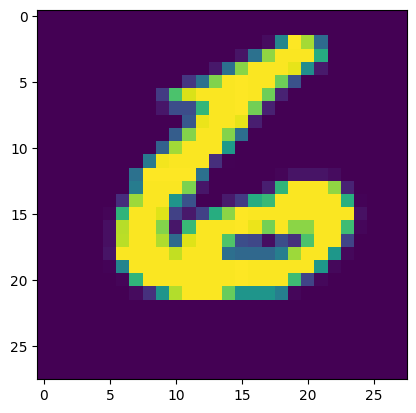

In [25]:
viz(69999)

In [17]:
y[1000]

np.float64(0.0)

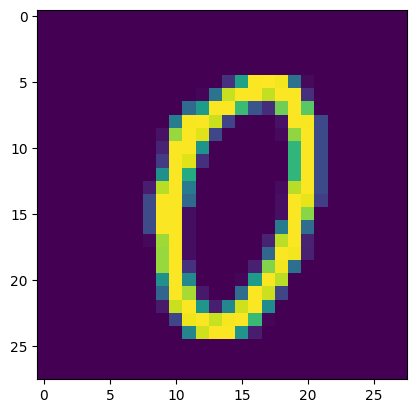

In [26]:
viz(1000)

---

# Ejercicio

## Localizar el numero 4 y mostrar la imagen

In [ ]:
# Aqui me da que es de tipo Serie, lo paso a array de numpy
type(y)

numpy.ndarray

In [30]:
y = np.array(y)
type(y)

numpy.ndarray

In [ ]:
# Obtenemos todas las posiciones en las que encontramos 4
np.where(y == 4)

(array([    2,     9,    20, ..., 69977, 69987, 69997], shape=(6824,)),)

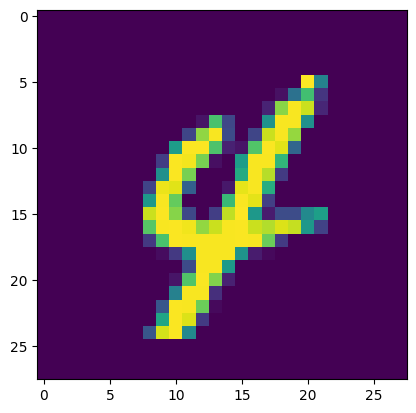

In [33]:
_ = X.iloc[69977]
_image = _.values.reshape(28,28)
plt.imshow(_image)

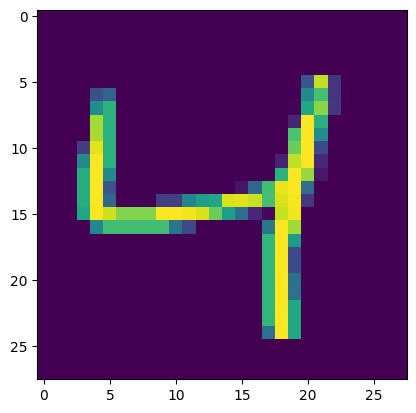

In [34]:
viz(2)

---
---

# Dividir los conjuntos de entrenamiento y prueba

## Metodo 1

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42) 

## Metodo 2

In [37]:
# Por un lado cogemos los 60K primeros valores y por otro los 10K ultimos
num_split = 60000
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

## Mezclando el dataset

Metodo alternativo

# Barajar aleatoriamente el conjunto de entrenamiento

Este bloque de código lo que hace es **barajar aleatoriamente (shuffle) el conjunto de entrenamiento**, 
de manera que las imágenes y sus etiquetas no queden en el mismo orden en que venían originalmente del dataset.

---

## ¿Por qué es importante?
Muchos datasets (como **MNIST**) vienen **ordenados por clases**  
(ejemplo: primero todos los ceros, luego todos los unos, etc.).  

Si no se barajan los datos:
- El modelo podría **aprender sesgos incorrectos**.
- El entrenamiento no sería representativo de la realidad.
- La capacidad de generalización se vería afectada.

---

✅ **Conclusión:**  
Barajar los datos garantiza que el modelo entrene con una mezcla equilibrada y aleatoria de ejemplos, 
evitando patrones artificiales en el orden del dataset.


In [47]:
import numpy as np
shuffle_index = np.random.permutation(num_split)
print(shuffle_index)
X_train, y_train = X_train.iloc[shuffle_index], y_train[shuffle_index]

[26945 38217 33912 ... 44736 33450 55659]


# Entrenando un Clasificador Binario

Para simplificar nuestro problema, haremos de esto un ejercicio de **“cero”** o **“no-cero”**, convirtiéndolo en un problema de dos clases.

Primero necesitamos convertir nuestro objetivo a **0 o no 0**.


In [48]:
y_train_0 = (y_train == 0)
y_train_0

array([False, False,  True, ..., False, False, False], shape=(60000,))

In [50]:
y_train[:3]

array([2., 1., 0.])

In [43]:
y_test_0 = (y_test == 0)
y_test_0

array([False, False, False, ..., False, False, False], shape=(10000,))

En este punto podemos elegir cualquier clasificador y entrenarlo.
Esta es la parte iterativa de elegir y probar todos los clasificadores y ajustar los hiperparámetros

---
---
# SGDClassifier

[SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  
Clasificadores lineales (SVM, regresión logística) con entrenamiento mediante **SGD** (Stochastic Gradient Descent).


## Entrenamiento

In [51]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


## Prediccion

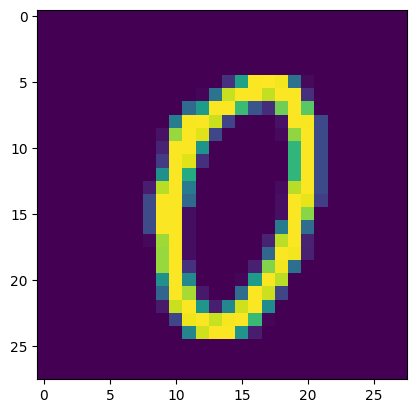

In [52]:
viz(1000)

In [54]:
clf.predict(X.iloc[1000].values.reshape(1, -1))

/home/iabd/Desktop/Ivan/Udemy/Curso_IA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

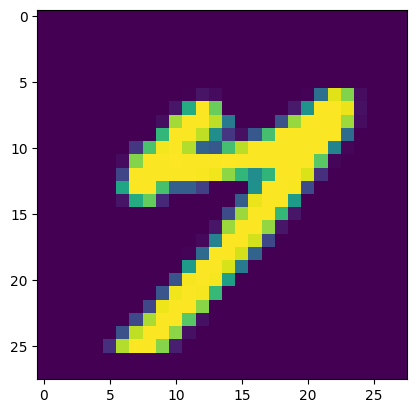

In [55]:
viz(1001)

In [56]:
clf.predict(X.iloc[1001].values.reshape(1, -1))

/home/iabd/Desktop/Ivan/Udemy/Curso_IA/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([False])